In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import winsound

import numpy as np
np.random.seed(1)  # Set seed

# df = pd.read_csv("../Data/bank.csv", sep=";")
df = pd.read_csv("../Data/Cleaned/bank-full_cleaned.csv")
print(len(df))
print(len(df.columns))
df.head()

45211
43


age   balance       day  duration  campaign  pdays  previous  \
0  0.519481  0.092259  0.133333  0.053070       0.0    0.0       0.0   
1  0.337662  0.073067  0.133333  0.030704       0.0    0.0       0.0   
2  0.194805  0.072822  0.133333  0.015453       0.0    0.0       0.0   
3  0.376623  0.086476  0.133333  0.018707       0.0    0.0       0.0   
4  0.194805  0.072812  0.133333  0.040260       0.0    0.0       0.0   

   job_blue-collar  job_entrepreneur  job_housemaid ...  month_jun  month_mar  \
0                0                 0              0 ...          0          0   
1                0                 0              0 ...          0          0   
2                0                 1              0 ...          0          0   
3                1                 0              0 ...          0          0   
4                0                 0              0 ...          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          1          0          0          0               0   
1          1          0          0          0               0   
2          1          0          0          0               0   
3          1          0          0          0               0   
4          1          0          0          0               0   

   poutcome_success  poutcome_unknown  y  
0                 0                 1  0  
1                 0                 1  0  
2                 0                 1  0  
3                 0                 1  0  
4                 0                 1  0  

[5 rows x 43 columns]

In [2]:
X = df.drop('y',axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)#, test_size=.4)

# Hidden Layers

In [3]:
def append_scores_to_hplist(hplist, target_hp):
    if target_hp == "hidden_layer_sizes":
        for i, item in enumerate(hplist):
            clf = MLPClassifier(hidden_layer_sizes=(item[0],), random_state=1, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)
            

        #     print(train_score)
        #     print(Accuracy)
        #     print(Sensitivity)
        #     print(Specificity)
        #     print("----")

            hplist[i].append(train_score)
            hplist[i].append(Accuracy)
            hplist[i].append(Sensitivity)
            hplist[i].append(Specificity)
        return hplist

In [14]:
hidden_layer_large = []
for i in range(1,21):
    hidden_layer_large.append([(i)*5])
print(hidden_layer_large)

hidden_layer_large = append_scores_to_hplist(hidden_layer_large, "hidden_layer_sizes")
winsound.Beep(400,300)
winsound.Beep(300,300)

[[5], [10], [15], [20], [25], [30], [35], [40], [45], [50], [55], [60], [65], [70], [75], [80], [85], [90], [95], [100]]


In [79]:
print(hidden_layer_large)

[[5, 0.90707207738586759, 0.90462709015305676, 0.42605363984674327, 0.96709341868373677], [10, 0.91134835437064998, 0.90843138989648764, 0.45823754789272031, 0.96719343868773755], [15, 0.91364869647280877, 0.90683889232947001, 0.48582375478927203, 0.96179235847169431], [20, 0.91299988203373839, 0.90683889232947001, 0.42145593869731801, 0.97019403880776156], [25, 0.91739412528016984, 0.90330000884720874, 0.50344827586206897, 0.95549109821964395], [30, 0.91471039282765132, 0.90621958772007427, 0.42911877394636017, 0.968493698739748], [35, 0.91733514214934531, 0.90719278067769615, 0.4689655172413793, 0.9643928785757151], [40, 0.91645039518697657, 0.90675042024241348, 0.43448275862068964, 0.96839367873574711], [45, 0.91751209154181901, 0.90648500398124388, 0.48045977011494251, 0.96209241848369675], [50, 0.92193582635366289, 0.90515792267539597, 0.5088122605363985, 0.95689137827565518], [55, 0.92175887696118908, 0.90931611076705299, 0.47739463601532567, 0.96569313862772554], [60, 0.92234870

In [71]:
hidden_layer_small = []
for i in range(1,11):
    hidden_layer_small.append([i*2])
print(hidden_layer_small) 

hidden_layer_small = append_scores_to_hplist(hidden_layer_small, "hidden_layer_sizes")
winsound.Beep(400,300)
winsound.Beep(300,300)

[[2], [4], [6], [8], [10], [12], [14], [16], [18], [20]]


In [80]:
print(hidden_layer_small)

[[2, 0.90229444378907631, 0.90170751128019111, 0.35095785440613025, 0.97359471894378879], [4, 0.90406393771381388, 0.90170751128019111, 0.35632183908045978, 0.97289457891578313], [6, 0.90553851598442847, 0.90462709015305676, 0.38467432950191571, 0.9724944988997799], [8, 0.91005072549250909, 0.90675042024241348, 0.46513409961685825, 0.9643928785757151], [10, 0.91134835437064998, 0.90843138989648764, 0.45823754789272031, 0.96719343868773755], [12, 0.9122036097676065, 0.90621958772007427, 0.49042145593869729, 0.96049209841968397], [14, 0.91235106759466789, 0.90860833407060071, 0.45057471264367815, 0.96839367873574711], [16, 0.91370767960363342, 0.90675042024241348, 0.47049808429118772, 0.96369273854770954], [18, 0.91370767960363342, 0.90666194815535694, 0.46436781609195404, 0.9643928785757151], [20, 0.91299988203373839, 0.90683889232947001, 0.42145593869731801, 0.97019403880776156]]


In [17]:
hidden_layer_large = [[5, 0.90707207738586759, 0.90462709015305676, 0.42605363984674327, 0.96709341868373677], [10, 0.91134835437064998, 0.90843138989648764, 0.45823754789272031, 0.96719343868773755], [15, 0.91364869647280877, 0.90683889232947001, 0.48582375478927203, 0.96179235847169431], [20, 0.91299988203373839, 0.90683889232947001, 0.42145593869731801, 0.97019403880776156], [25, 0.91739412528016984, 0.90330000884720874, 0.50344827586206897, 0.95549109821964395], [30, 0.91471039282765132, 0.90621958772007427, 0.42911877394636017, 0.968493698739748], [35, 0.91733514214934531, 0.90719278067769615, 0.4689655172413793, 0.9643928785757151], [40, 0.91645039518697657, 0.90675042024241348, 0.43448275862068964, 0.96839367873574711], [45, 0.91751209154181901, 0.90648500398124388, 0.48045977011494251, 0.96209241848369675], [50, 0.92193582635366289, 0.90515792267539597, 0.5088122605363985, 0.95689137827565518], [55, 0.92175887696118908, 0.90931611076705299, 0.47739463601532567, 0.96569313862772554], [60, 0.92234870826943494, 0.90613111563301774, 0.44137931034482758, 0.96679335867173433], [65, 0.92105107939129405, 0.90648500398124388, 0.45593869731800768, 0.96529305861172232], [70, 0.92400023593252334, 0.90666194815535694, 0.48122605363984672, 0.96219243848769753], [75, 0.92305650583932997, 0.90763514111297883, 0.44674329501915711, 0.96779355871174233], [80, 0.92187684322283825, 0.90595417145890467, 0.47356321839080462, 0.96239247849569909], [85, 0.9257697298572608, 0.90383084136954794, 0.56245210727969353, 0.94838967793558715], [90, 0.92509142385277809, 0.9049809785012829, 0.55019157088122606, 0.95129025805161027], [95, 0.92323345523180367, 0.90506945058833943, 0.47662835249042146, 0.96099219843968797], [100, 0.92824702135189341, 0.90506945058833943, 0.48199233716475098, 0.9602920584116823]]

hidden_layer_small = [[2, 0.90229444378907631, 0.90170751128019111, 0.35095785440613025, 0.97359471894378879], [4, 0.90406393771381388, 0.90170751128019111, 0.35632183908045978, 0.97289457891578313], [6, 0.90553851598442847, 0.90462709015305676, 0.38467432950191571, 0.9724944988997799], [8, 0.91005072549250909, 0.90675042024241348, 0.46513409961685825, 0.9643928785757151], [10, 0.91134835437064998, 0.90843138989648764, 0.45823754789272031, 0.96719343868773755], [12, 0.9122036097676065, 0.90621958772007427, 0.49042145593869729, 0.96049209841968397], [14, 0.91235106759466789, 0.90860833407060071, 0.45057471264367815, 0.96839367873574711], [16, 0.91370767960363342, 0.90675042024241348, 0.47049808429118772, 0.96369273854770954], [18, 0.91370767960363342, 0.90666194815535694, 0.46436781609195404, 0.9643928785757151], [20, 0.91299988203373839, 0.90683889232947001, 0.42145593869731801, 0.97019403880776156]]

# Plot hidden layer hp

In [6]:
def plot_hidden_layers(hplist, name_of_input_data):
    x = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    for item in hplist:
        x.append(item[0])
        y1.append(item[1])
        y2.append(item[2])
        y3.append(item[3])
        y4.append(item[4])
    plt.figure(figsize=(5.5,3))
    title = "Testing and Training Accuracy"
    plt.title(title)
    plt.xlabel("Neurons in Hidden Layer")
    plt.ylabel("Score")
    plt.plot(x, y1, label = "Train")
    plt.plot(x, y2, "r", label = "Test")
    plt.legend(loc = "best")
    plt.savefig("../Figures/%s %s.png"%(name_of_input_data, title))
    plt.show()
    
    plt.figure(figsize=(5.5,3))
    title = "Test Accuracy, Sensitivity, Specificity"
    plt.title(title)
    plt.xlabel("Neurons in Hidden Layer")
    plt.ylabel("Score")
    plt.plot(x, y2, "r", label = "Accuracy")
    plt.plot(x, y3, label = "Sensitivity")
    plt.plot(x, y4, label = "Specificity")
    plt.legend(loc = "best")
    plt.savefig("../Figures/%s %s.png"%(name_of_input_data, title))
    plt.show()
    
    plt.figure(figsize=(5.5,3))
    title = "Test Accuracy"
    plt.title(title)
    plt.xlabel("Neurons in Hidden Layer")
    plt.ylabel("Score")
    plt.plot(x, y2, "r", label = "Accuracy")
    plt.legend(loc = "best")
    plt.savefig("../Figures/%s %s.png"%(name_of_input_data, title))
    plt.show()
    
    plt.figure(figsize=(5.5,3))
    title = "Test Sensitivity"
    plt.title(title)
    plt.xlabel("Neurons in Hidden Layer")
    plt.ylabel("Score")
    plt.plot(x, y3, label = "Sensitivity")
    plt.legend(loc = "best")
    plt.savefig("../Figures/%s %s.png"%(name_of_input_data, title))
    plt.show()
    
    plt.figure(figsize=(5.5,3))
    title = "Test Specificity"
    plt.title(title)
    plt.xlabel("Neurons in Hidden Layer")
    plt.ylabel("Score")
    plt.plot(x, y4, "g", label = "Specificity")
    plt.legend(loc = "best")
    plt.savefig("../Figures/%s %s.png"%(name_of_input_data, title))
    plt.show()

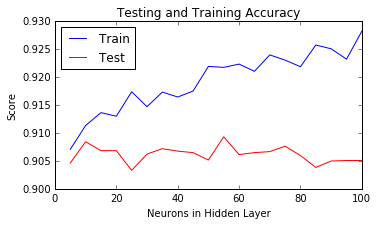

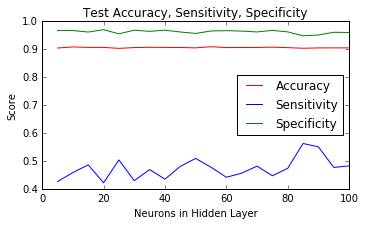

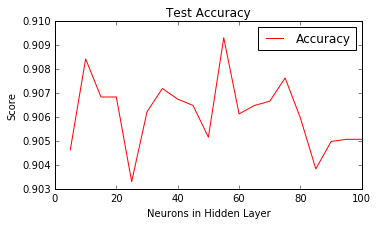

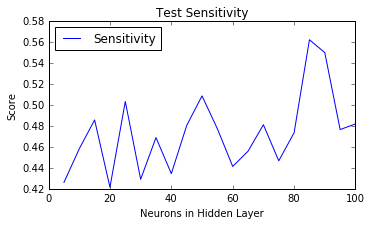

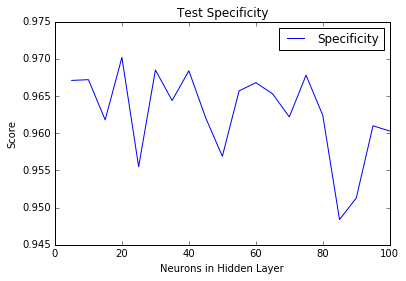

In [73]:
plot_hidden_layers(hidden_layer_large, "One Hidden Layer 5 to 100 Neurons -")

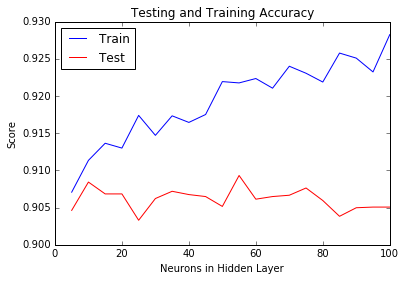

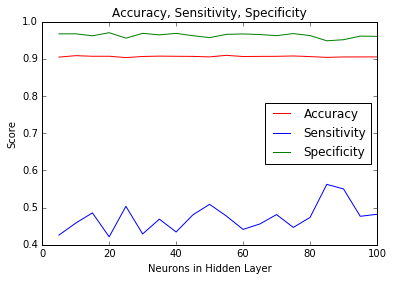

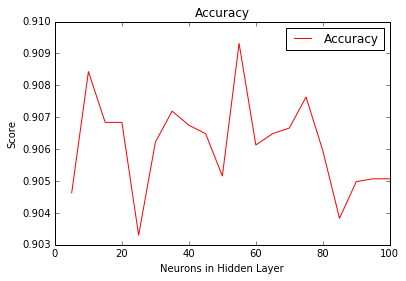

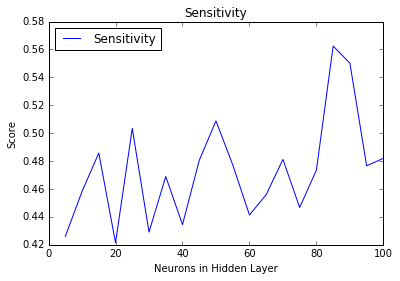

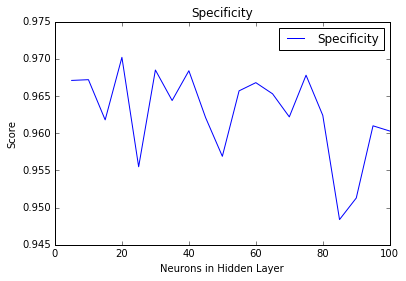

In [61]:
# print("---------\nlarge\n---------\n")
plot_hidden_layers(hidden_layer_large, "One Hidden Layer 5 to 100 Neurons -")
# print("---------\nsmall\n---------\n")
# plot_hidden_layers(hidden_layer_small)
# winsound.Beep(400,300)
# winsound.Beep(300,300)

C:\Users\Kieron\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


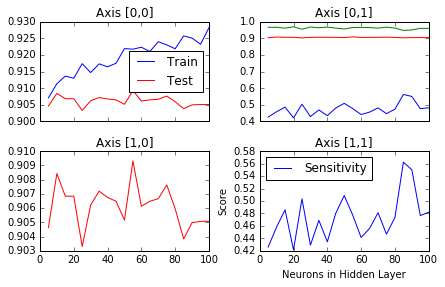

In [50]:
# def subplots_hidden_layers(hplist):
#     x = []
#     y1 = []
#     y2 = []
#     y3 = []
#     y4 = []
#     for item in hplist:
#         x.append(item[0])
#         y1.append(item[1])
#         y2.append(item[2])
#         y3.append(item[3])
#         y4.append(item[4])  

# #     plt.title("Specificity")
# #     plt.xlabel("Neurons in Hidden Layer")
# #     plt.ylabel("Score")
# #     plt.plot(x, y4, label = "Specificity")
# #     plt.legend(loc = "best")
# #     plt.show()
    
#     # Four axes, returned as a 2-d array
#     fig, axarr = plt.subplots(2, 2,sharex="col")
    
# #     axarr[0, 0].plot(x, y1)
#     plt.title("Testing and Training Accuracy")
# #     axarr[0, 0].xlabel("Neurons in Hidden Layer")
# #     axarr[0, 0].ylabel("Score")
#     axarr[0, 0].plot(x, y1, label = "Train")
#     axarr[0, 0].plot(x, y2, "r", label = "Test")
#     axarr[0, 0].legend(loc = "best")
# #     plt.show()
#     axarr[0, 0].set_title('Axis [0,0]')

# #     axarr[0, 1].scatter(x, y2)
#     plt.title("Accuracy, Sensitivity, Specificity")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     axarr[0, 1].plot(x, y2, "r", label = "Accuracy")
#     axarr[0, 1].plot(x, y3, label = "Sensitivity")
#     axarr[0, 1].plot(x, y4, label = "Specificity")
#     plt.legend(loc = "best")
# #     plt.show()
#     axarr[0, 1].set_title('Axis [0,1]')

# #     axarr[1, 0].plot(x, y3)
#     plt.title("Accuracy")
# #     plt.xlabel("Neurons in Hidden Layer")
# #     plt.ylabel("Score")
#     axarr[1, 0].plot(x, y2, "r", label = "Accuracy")
#     plt.legend(loc = "best")
# #     plt.show()
#     axarr[1, 0].set_title('Axis [1,0]')

# #     axarr[1, 1].scatter(x, y4)
#     plt.title("Sensitivity")
# #     plt.xlabel("Neurons in Hidden Layer")
# #     plt.ylabel("Score")
#     axarr[1, 1].plot(x, y3, label = "Sensitivity")
#     plt.legend(loc = "best")
# #     plt.show()
#     axarr[1, 1].set_title('Axis [1,1]')
    
#     fig.subplots_adjust(top=0.92, left=0.07, right=0.97, hspace=0.3, wspace=0.3)
    
    
# #     plt.show()

# # # Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# # plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# # plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# subplots_hidden_layers(hidden_layer_large)

ValueError: Illegal argument(s) to subplot: ([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], [0.9070720773858676, 0.91134835437065, 0.9136486964728088, 0.9129998820337384, 0.9173941252801698, 0.9147103928276513, 0.9173351421493453, 0.9164503951869766, 0.917512091541819, 0.9219358263536629, 0.9217588769611891, 0.9223487082694349, 0.921051079391294, 0.9240002359325233, 0.92305650583933, 0.9218768432228382, 0.9257697298572608, 0.9250914238527781, 0.9232334552318037, 0.9282470213518934])

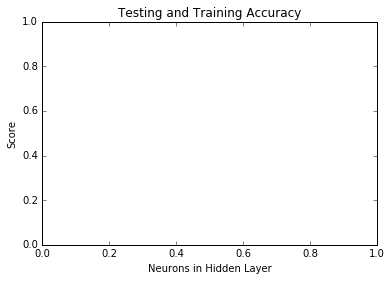

In [36]:
# def subplots_hidden_layers(hplist):
#     x = []
#     y1 = []
#     y2 = []
#     y3 = []
#     y4 = []
#     for item in hplist:
#         x.append(item[0])
#         y1.append(item[1])
#         y2.append(item[2])
#         y3.append(item[3])
#         y4.append(item[4])  
#     plt.figure(1)

#     plt.title("Testing and Training Accuracy")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.subplot(x, y1, label = "Train")
#     plt.subplot(x, y2, "r", label = "Test")
#     plt.legend(loc = "best")

#     plt.title("Accuracy, Sensitivity, Specificity")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.plot(x, y2, "r", label = "Accuracy")
#     plt.plot(x, y3, label = "Sensitivity")
#     plt.plot(x, y4, label = "Specificity")
#     plt.legend(loc = "best")

#     plt.title("Accuracy")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.plot(x, y2, "r", label = "Accuracy")
#     plt.legend(loc = "best")

#     plt.title("Sensitivity")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.plot(x, y3, label = "Sensitivity")
#     plt.legend(loc = "best")
    
#     plt.show()
# subplots_hidden_layers(hidden_layer_large)

In [74]:
def append_scores_given_neurons(neurons, iterations=5):
    hplist = []
    for i in range(1,iterations+1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i*1000)
        clf = MLPClassifier(hidden_layer_sizes=(neurons,), random_state=i*1000, max_iter=500)
        clf.fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        predictions = clf.predict(X_test)
        conf_matrix = confusion_matrix(y_test,predictions)
        TN = conf_matrix[0][0]
        TP = conf_matrix[1][1]
        FN = conf_matrix[1][0]
        FP = conf_matrix[0][1]
        Accuracy = (TP+TN)/(TN+TP+FN+FP)
        Sensitivity = TP/(TP+FN)
        Specificity = TN/(TN+FP)
        
        scores = [train_score, Accuracy, Sensitivity, Specificity]
        hplist.append(scores)
    return hplist

In [75]:
neurons_10 = append_scores_given_neurons(10, 5)
neurons_50 = append_scores_given_neurons(50, 5)
neurons_85 = append_scores_given_neurons(85, 5)
winsound.Beep(400,300)
winsound.Beep(300,300)

In [76]:
print(neurons_10)
print(neurons_50)
print(neurons_85)

[[0.91285242420667689, 0.90338848093426527, 0.44616519174041297, 0.96571830702724437], [0.9083991978294208, 0.90745819693886576, 0.43351268255188319, 0.96910617876424721], [0.91064055680075495, 0.9060426435459612, 0.41292775665399239, 0.97096515818982776], [0.91016869175415827, 0.90772361320003536, 0.43972179289026275, 0.96822859426516139], [0.91031614958121976, 0.90869680615765724, 0.46723868954758191, 0.96517313641353153]]
[[0.92373481184381268, 0.90560028311067853, 0.49410029498525071, 0.96169699406856335], [0.91942904329361808, 0.91082013624701408, 0.46656418139892392, 0.9686062787442512], [0.92290904801226847, 0.9049809785012829, 0.47832699619771862, 0.96115338406087303], [0.9189866698124336, 0.90666194815535694, 0.44744976816074189, 0.96603057248476376], [0.92202430104989974, 0.90905069450588338, 0.47659906396255852, 0.96437481289292482]]
[[0.92697888403916484, 0.89967265327789081, 0.50811209439528027, 0.95305117120739924], [0.92579922142267312, 0.90913916659293992, 0.46118370484

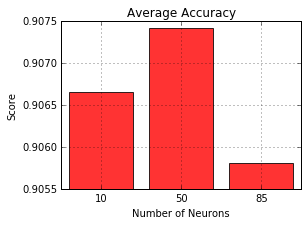

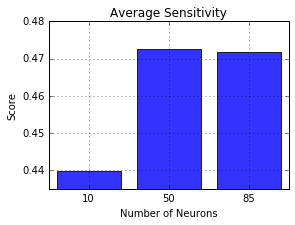

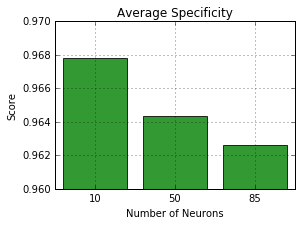

In [169]:
def plot_ave_neurons_3on1(acc,sens,spec, title):
    index = [0,1,2]
    ind2 = [0.12,1.12,2.12]
    ind3 = [0.24,1.24,2.24]
    width = 0.12
    plt.figure(figsize=(5.5,2))
    plt.bar(index, acc, tick_label=["10","50","85"], align="center", color="r", width=width)
    plt.bar(ind2, sens, tick_label=["10","50","85"], align="center", color='b', width=width)
    plt.bar(ind3, spec, tick_label=["10","50","85"], align="center", color='g', width=width)
    plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.title("Average "+title+" After 5 Experiments")
    plt.xlabel("Number of Neurons")
    plt.ylabel("Score")
    plt.show()
    
def plot_average_scores(ave_scores):
    x = [10,50,85]
    ave_train_acc = []
    ave_accuracy = []
    ave_sensitivity = []
    ave_specificity = []
    train_acc = []
    accuracy = []
    sensitivity = [] 
    Specificity = []
    for hplist in hplists:
        for item in hplist:
            train_acc.append(item[0])
            accuracy.append(item[1])
            sensitivity.append(item[2])
            specificity.append(item[3])
    plt.title("Testing and Training Accuracy")
    plt.xlabel("Test Number")
    plt.ylabel("Score")
    plt.plot(train_acc, label = "Train")
    plt.plot(accuracy, "r", label = "Test")
    plt.legend(loc = "best")
    plt.show()
    
#     plt.title("Accuracy, Sensitivity, Specificity")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.plot(x, y2, "r", label = "Accuracy")
#     plt.plot(x, y3, label = "Sensitivity")
#     plt.plot(x, y4, label = "Specificity")
#     plt.legend(loc = "best")
#     plt.show()
def get_average_scores(hplist):
    train_acc = []
    accuracy = []
    sensitivity = [] 
    specificity = []
    
    for item in hplist:
        train_acc.append(item[0])
        accuracy.append(item[1])
        sensitivity.append(item[2])
        specificity.append(item[3])
    train_acc = np.mean(train_acc)
    accuracy = np.mean(accuracy)
    sensitivity = np.mean(sensitivity)
    specificity = np.mean(specificity)
     
    return [train_acc, accuracy, sensitivity, specificity]

ave_neurons_10 = get_average_scores(neurons_10)
ave_neurons_50 = get_average_scores(neurons_50)
ave_neurons_85 = get_average_scores(neurons_85)

ave_train_acc = []
ave_accuracy = []
ave_sensitivity = []
ave_specificity = []
hplists = [ave_neurons_10, ave_neurons_50, ave_neurons_85]
for hplist in hplists:
    ave_train_acc.append(hplist[0])
    ave_accuracy.append(hplist[1])
    ave_sensitivity.append(hplist[2])
    ave_specificity.append(hplist[3])

def plot_ave_neurons(hplist, title, colour, bottom, top):
    index = [0,1,2]
    plt.figure(figsize=(4.3,3))
    plt.bar(index, hplist, tick_label=["10","50","85"], align="center", color = colour, alpha = 0.8)#, width=.35)
#     plt.ylim(round((min(hplist)-0.001)*100)/100, round((max(hplist)+0.0001)*100)/100)
    plt.ylim(bottom, top)
    plt.title("Average "+title)
    plt.xlabel("Number of Neurons")
    plt.ylabel("Score")
    plt.grid()
    plt.savefig("../../Figures/Average %s 1st hidden layer.png" %title)
    plt.show()
# plot_ave_neurons(ave_train_acc, "Training Accuracy")
plot_ave_neurons(ave_accuracy, "Accuracy", "r", 0.9055, 0.9075)
plot_ave_neurons(ave_sensitivity, "Sensitivity", "b", 0.435, round((max(ave_sensitivity)+0.01)*100)/100)
plot_ave_neurons(ave_specificity, "Specificity", "g", round((min(ave_specificity)-0.0001)*100)/100, 
                 round((max(ave_specificity)+0.0001)*100)/100)

print(neurons_10)

[[0.90975580983838622, 0.90958152702822259, 0.47126436781609193, 0.96679335867173433], [0.91123038810900081, 0.90666194815535694, 0.44214559386973179, 0.96729345869173833], [0.90981479296921075, 0.90551181102362199, 0.41455938697318007, 0.96959391878375678], [0.91167276159018518, 0.90728125276475269, 0.45900383141762452, 0.96579315863172632], [0.91134835437064998, 0.90613111563301774, 0.46130268199233715, 0.96419283856771354]]

print(neurons_50)

[[0.92220125044237344, 0.9080775015482615, 0.47662835249042146, 0.9643928785757151], [0.92078565530258349, 0.90772361320003536, 0.48659003831417624, 0.96269253850770153], [0.92060870591010968, 0.90728125276475269, 0.52643678160919538, 0.95699139827965596], [0.92332192992804063, 0.90878527824471378, 0.4574712643678161, 0.96769353870774155], [0.91777751563052967, 0.9078120852870919, 0.442911877394636, 0.968493698739748]]

print(neurons_85)

[[0.92739176595493689, 0.90515792267539597, 0.49961685823754787, 0.95809161832366474], [0.92630057803468213, 0.90436167389188715, 0.47279693486590041, 0.96069213842768553], [0.92140497817624156, 0.9052463947624525, 0.42222222222222222, 0.96829365873174633], [0.92111006252211869, 0.9052463947624525, 0.40536398467432949, 0.97049409881976401], [0.92402972749793555, 0.9057772272847916, 0.49655172413793103, 0.95919183836767352]]

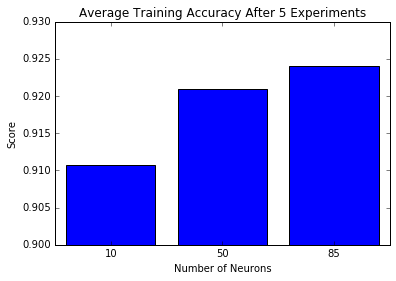

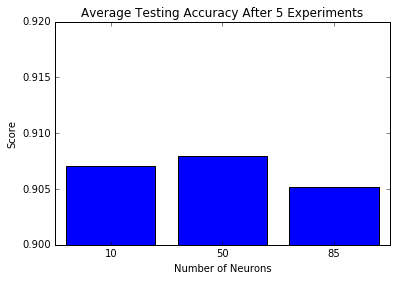

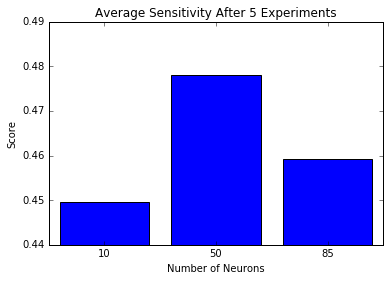

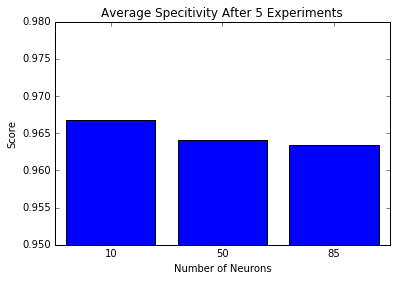

In [153]:
def plot_average_scores(ave_scores):
    x = [10,50,85]
    ave_train_acc = []
    ave_accuracy = []
    ave_sensitivity = []
    ave_specificity = []
    train_acc = []
    accuracy = []
    sensitivity = [] 
    Specificity = []
    for hplist in hplists:
        for item in hplist:
            train_acc.append(item[0])
            accuracy.append(item[1])
            sensitivity.append(item[2])
            specificity.append(item[3])
    plt.title("Testing and Training Accuracy")
    plt.xlabel("Test Number")
    plt.ylabel("Score")
    plt.plot(train_acc, label = "Train")
    plt.plot(accuracy, "r", label = "Test")
    plt.legend(loc = "best")
    plt.show()
    
#     plt.title("Accuracy, Sensitivity, Specificity")
#     plt.xlabel("Neurons in Hidden Layer")
#     plt.ylabel("Score")
#     plt.plot(x, y2, "r", label = "Accuracy")
#     plt.plot(x, y3, label = "Sensitivity")
#     plt.plot(x, y4, label = "Specificity")
#     plt.legend(loc = "best")
#     plt.show()
def get_average_scores(hplist):
    train_acc = []
    accuracy = []
    sensitivity = [] 
    specificity = []
    
    for item in hplist:
        train_acc.append(item[0])
        accuracy.append(item[1])
        sensitivity.append(item[2])
        specificity.append(item[3])
    train_acc = np.mean(train_acc)
    accuracy = np.mean(accuracy)
    sensitivity = np.mean(sensitivity)
    specificity = np.mean(specificity)
     
    return [train_acc, accuracy, sensitivity, specificity]

ave_neurons_10 = get_average_scores(neurons_10)
ave_neurons_50 = get_average_scores(neurons_50)
ave_neurons_85 = get_average_scores(neurons_85)

ave_train_acc = []
ave_accuracy = []
ave_sensitivity = []
ave_specificity = []
hplists = [ave_neurons_10, ave_neurons_50, ave_neurons_85]
for hplist in hplists:
    ave_train_acc.append(hplist[0])
    ave_accuracy.append(hplist[1])
    ave_sensitivity.append(hplist[2])
    ave_specificity.append(hplist[3])

def plot_ave_neurons(hplist, title):
    index = [0,1,2]
    plt.bar(index, hplist, tick_label=["10","50","85"], align="center")
    plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.title("Average "+title+" After 5 Experiments")
    plt.xlabel("Number of Neurons")
    plt.ylabel("Score")
    plt.show()

plot_ave_neurons(ave_train_acc, "Training Accuracy")
plot_ave_neurons(ave_accuracy, "Accuracy")
plot_ave_neurons(ave_sensitivity, "Sensitivity")
plot_ave_neurons(ave_specificity, "Specificity")

# Number of Layers

clf = MLPClassifier(hidden_layer_sizes=(10, 8, 5),
                    solver="lbfgs", #{‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’,
                    max_iter=500,
                    alpha=0.1)

In [195]:
def append_scores_to_hplist(hplist, target_hp):
    if target_hp == "hidden_layer_sizes":
        for i, item in enumerate(hplist):
            clf = MLPClassifier(hidden_layer_sizes=(item[0],), random_state=1, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)

        #     print(train_score)
        #     print(Accuracy)
        #     print(Sensitivity)
        #     print(Specificity)
        #     print("----")

            hplist[i].append(train_score)
            hplist[i].append(Accuracy)
            hplist[i].append(Sensitivity)
            hplist[i].append(Specificity)
        
    elif target_hp == "second_hidden_layer":
        scores = []
        for i, item in enumerate(hplist):
            clf = MLPClassifier(hidden_layer_sizes=(50,item[0]), random_state=1, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)

        #     print(train_score)
        #     print(Accuracy)
        #     print(Sensitivity)
        #     print(Specificity)
        #     print("----")

            hplist[i].append(train_score)
            hplist[i].append(Accuracy)
            hplist[i].append(Sensitivity)
            hplist[i].append(Specificity)

    elif target_hp == "third_hidden_layer":
        scores = []
        for i, item in enumerate(hplist):
            clf = MLPClassifier(hidden_layer_sizes=(50,30,item[0]), random_state=1, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)

        #     print(train_score)
        #     print(Accuracy)
        #     print(Sensitivity)
        #     print(Specificity)
        #     print("----")

            hplist[i].append(train_score)
            hplist[i].append(Accuracy)
            hplist[i].append(Sensitivity)
            hplist[i].append(Specificity)
    elif target_hp == "fourth_hidden_layer":
        scores = []
        for i, item in enumerate(hplist):
            clf = MLPClassifier(hidden_layer_sizes=(50,30,15,item[0]), random_state=1, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)

        #     print(train_score)
        #     print(Accuracy)
        #     print(Sensitivity)
        #     print(Specificity)
        #     print("----")

            hplist[i].append(train_score)
            hplist[i].append(Accuracy)
            hplist[i].append(Sensitivity)
            hplist[i].append(Specificity)
        return hplist

In [175]:
hplist = []
for i in range(1,6):
    hplist.append([i*10])
print(hplist)

[[10], [20], [30], [40], [50]]


In [176]:
hplist = append_scores_to_hplist(hplist, "second_hidden_layer")

In [178]:
print(hplist)

[[10, 0.92414769375958472, 0.90453861806600022, 0.50421455938697313, 0.95679135827165429], [20, 0.91987141677480244, 0.90453861806600022, 0.47279693486590041, 0.96089217843568708], [30, 0.92523888167983959, 0.90365389719543487, 0.58850574712643677, 0.94478895779155836], [40, 0.92630057803468213, 0.90312306467309567, 0.47509578544061304, 0.95899179835967197], [50, 0.93455821635012382, 0.90126515084490844, 0.52337164750957854, 0.95059011802360471]]


In [170]:
hplist = [[10, 0.92414769375958472, 0.90453861806600022, 0.50421455938697313, 0.95679135827165429], [20, 0.91987141677480244, 0.90453861806600022, 0.47279693486590041, 0.96089217843568708], [30, 0.92523888167983959, 0.90365389719543487, 0.58850574712643677, 0.94478895779155836], [40, 0.92630057803468213, 0.90312306467309567, 0.47509578544061304, 0.95899179835967197], [50, 0.93455821635012382, 0.90126515084490844, 0.52337164750957854, 0.95059011802360471]]

[[10, 0.92414769375958472, 0.90453861806600022, 0.50421455938697313, 0.95679135827165429], [20, 0.91987141677480244, 0.90453861806600022, 0.47279693486590041, 0.96089217843568708], [30, 0.92523888167983959, 0.90365389719543487, 0.58850574712643677, 0.94478895779155836], [40, 0.92630057803468213, 0.90312306467309567, 0.47509578544061304, 0.95899179835967197], [50, 0.93455821635012382, 0.90126515084490844, 0.52337164750957854, 0.95059011802360471]]

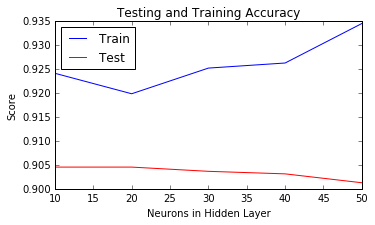

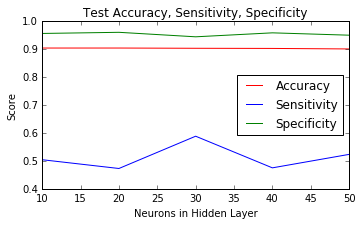

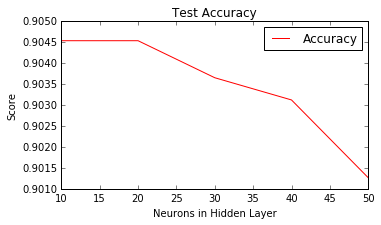

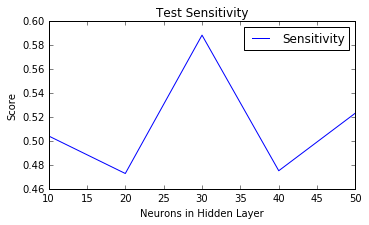

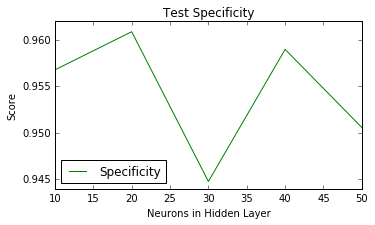

In [180]:
plot_hidden_layers(hplist, "Second Hidden Layer")

# Third Hidden Layer

In [190]:
hplist = []
for i in range(1,6):
    hplist.append([i*5])
print(hplist)
hplist = append_scores_to_hplist(hplist, "third_hidden_layer")
print(hplist)
winsound.Beep(400,400)
winsound.Beep(300,400)

[[5], [10], [15], [20], [25]]
[[5, 0.92574023829184848, 0.9060426435459612, 0.51340996168582376, 0.95729145829165829], [10, 0.92627108646926981, 0.90303459258603913, 0.50344827586206897, 0.95519103820764151], [15, 0.92910227674884982, 0.90038042997434309, 0.55862068965517242, 0.94498899779955992], [20, 0.94361212693169749, 0.90002654162611695, 0.47816091954022988, 0.95509101820364073], [25, 0.92057921434469747, 0.90418472971777408, 0.55555555555555558, 0.94968993798759749]]


In [182]:
hplist = [[5, 0.92574023829184848, 0.9060426435459612, 0.51340996168582376, 0.95729145829165829], [10, 0.92627108646926981, 0.90303459258603913, 0.50344827586206897, 0.95519103820764151], [15, 0.92910227674884982, 0.90038042997434309, 0.55862068965517242, 0.94498899779955992], [20, 0.94361212693169749, 0.90002654162611695, 0.47816091954022988, 0.95509101820364073], [25, 0.92057921434469747, 0.90418472971777408, 0.55555555555555558, 0.94968993798759749]]

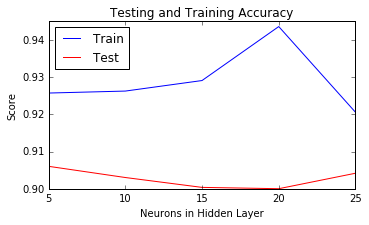

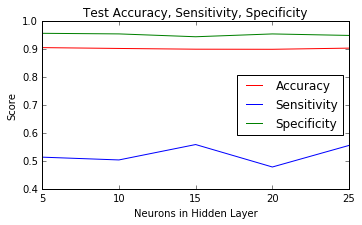

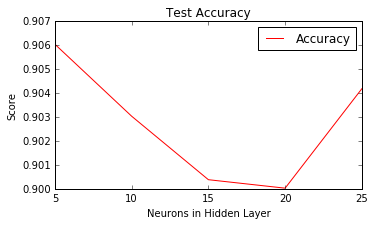

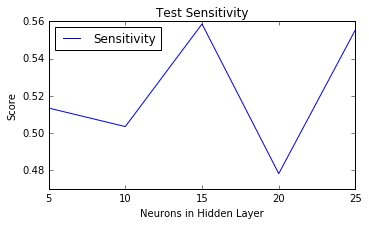

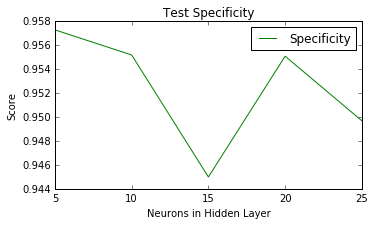

In [183]:
plot_hidden_layers(hplist, "Third Hidden Layer")

# Fourth Hidden Layer

In [196]:
hplist = []
for i in range(1,6):
    hplist.append([i*2])
print(hplist)
hplist = append_scores_to_hplist(hplist, "fourth_hidden_layer")
print(hplist)
winsound.Beep(400,400)
winsound.Beep(300,400)

[[2], [4], [6], [8], [10]]
[[2, 0.93393889347646575, 0.9011766787578519, 0.55172413793103448, 0.94678935787157437], [4, 0.92821752978648109, 0.89852251614615586, 0.59999999999999998, 0.93748749749949989], [6, 0.93730093193346697, 0.89622224188268607, 0.53256704980842917, 0.94368873774754947], [8, 0.93411584286893945, 0.90232681588958685, 0.52873563218390807, 0.95109021804360871], [10, 0.92727379969328771, 0.90427320180483062, 0.48888888888888887, 0.95849169833966796]]


In [4]:
hplist = [[2, 0.93393889347646575, 0.9011766787578519, 0.55172413793103448, 0.94678935787157437], [4, 0.92821752978648109, 0.89852251614615586, 0.59999999999999998, 0.93748749749949989], [6, 0.93730093193346697, 0.89622224188268607, 0.53256704980842917, 0.94368873774754947], [8, 0.93411584286893945, 0.90232681588958685, 0.52873563218390807, 0.95109021804360871], [10, 0.92727379969328771, 0.90427320180483062, 0.48888888888888887, 0.95849169833966796]]

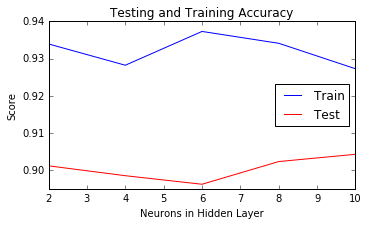

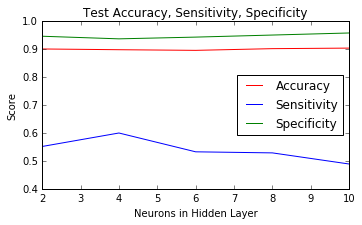

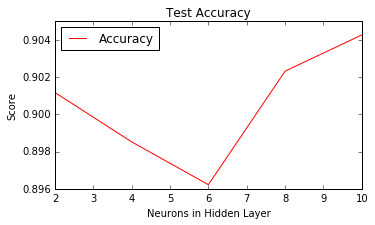

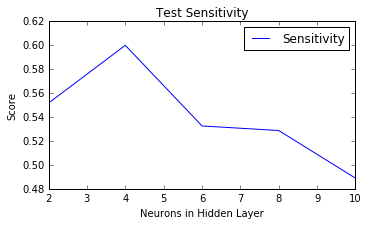

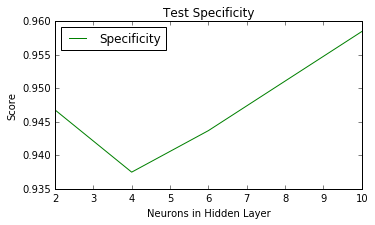

In [7]:
plot_hidden_layers(hplist, "Fourth Hidden Layer")

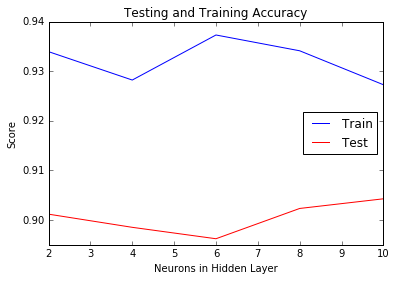

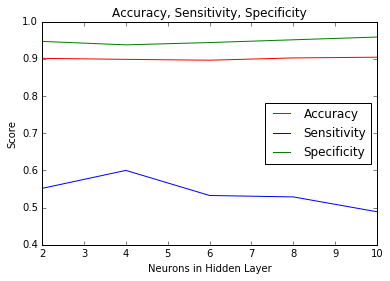

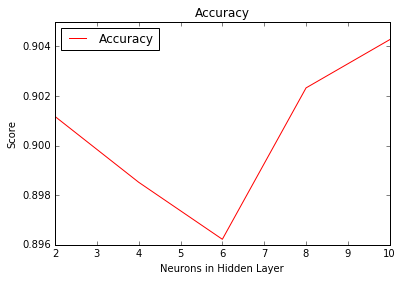

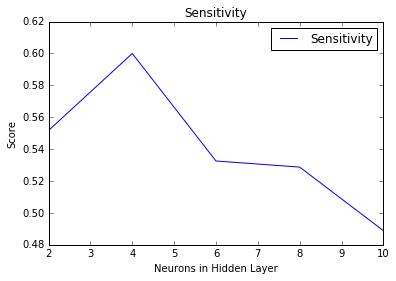

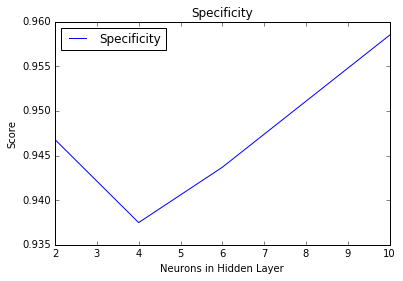

In [197]:
plot_hidden_layers(hplist)

# Compare Optimal Layers Solutions so far

In [34]:
def get_scores_given_hidden_layers(hidden_layers, iterations):
    hplist = [[] for item in hidden_layers]
    for i, item in enumerate(hidden_layers):
        ave_list = [[],[],[],[]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)#, test_size=.4)
        for j in range(1,iterations+1):
            if iterations == 6:
                if j%3 ==0:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=(j)*1000)
            else:
                if j%2 == 0:
                    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=(j)*1000)
            clf = MLPClassifier(hidden_layer_sizes=item, random_state=(j)*1000, max_iter=500)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)
            
            ave_list[0].append(train_score)
            ave_list[1].append(Accuracy)
            ave_list[2].append(Sensitivity)
            ave_list[3].append(Specificity)            
        
        hplist[i].append(np.mean(ave_list[0]))
        hplist[i].append(np.mean(ave_list[1]))
        hplist[i].append(np.mean(ave_list[2]))
        hplist[i].append(np.mean(ave_list[3]))

    return hplist

### new test train split every iteration

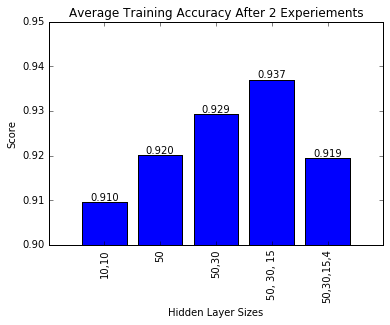

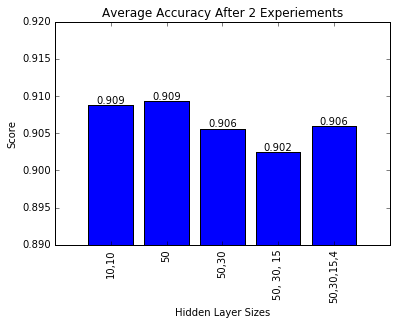

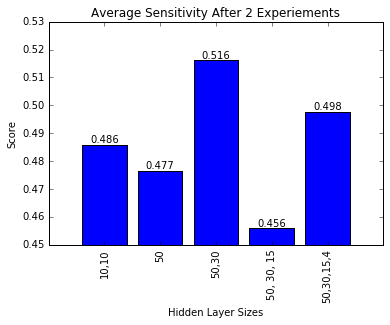

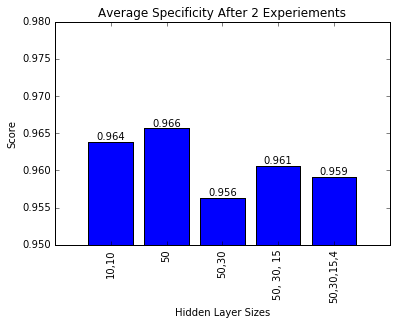

In [30]:
optimal_hidden_layers = [(10,10), (50,), (50,30), (50, 30, 15), (50,30,15,4)]
optimal_scores = get_scores_given_hidden_layers(optimal_hidden_layers, 2)
print(optimal_scores)
optimal_scores = [[0.90954936888050009, 0.90874104220118546, 0.48582552177664695, 0.96385022855400915], [0.92010734929810079, 0.90927187472352466, 0.47657710985655011, 0.96564940862597637], [0.92929397192402974, 0.90560028311067864, 0.51613259473261064, 0.95635050825402035], [0.936991270496638, 0.9024595240201716, 0.45588627669255305, 0.96065008842600352], [0.91939955172820576, 0.90595417145890467, 0.49767582260624749, 0.95914976836599075]]
winsound.Beep(400,400)
winsound.Beep(300,400)

aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_optimal_hidden_layers(aveop_train_acc, "Training Accuracy After 2 Experiements", 
                           ["10,10", "50", "50,30", "50, 30, 15", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_accuracy, "Accuracy After 2 Experiements", ["10,10", "50", "50,30", "50, 30, 15", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_sensitivity, "Sensitivity After 2 Experiements", ["10,10", "50", "50,30", "50, 30, 15", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_specificity, "Specificity After 2 Experiements", ["10,10", "50", "50,30", "50, 30, 15", "50,30,15,4"])

### 4 experiements per MLP

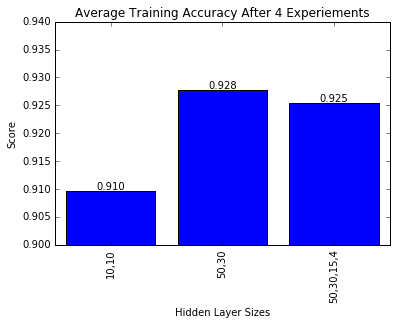

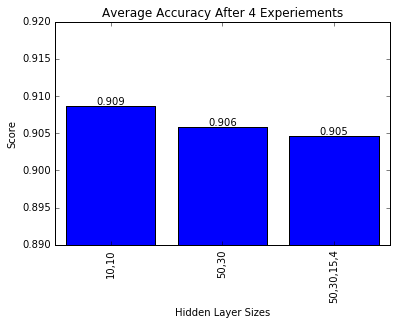

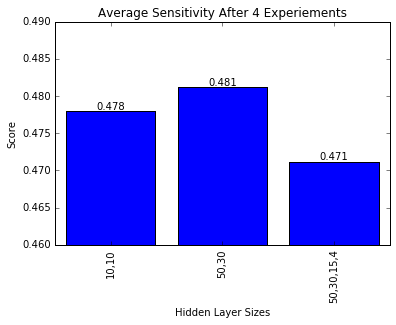

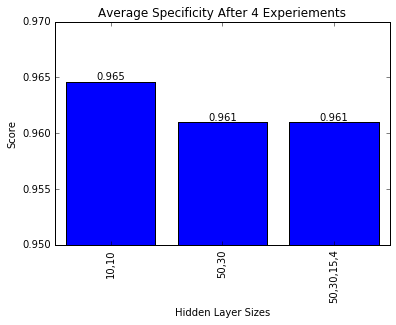

In [33]:
# optimal_hidden_layers = [(10,10), (50,30), (50,30,15,4)]
# optimal_scores = get_scores_given_hidden_layers(optimal_hidden_layers, 4)
# print(optimal_scores)
# winsound.Beep(400,400)
# winsound.Beep(300,400)

#[[0.90965258935944315, 0.90863045209236482, 0.477970474191727, 0.96460973181448217], [0.92769405450041287, 0.90582146332831992, 0.48119138720921539, 0.9610103486127588], [0.92542320396366651, 0.90462709015305665, 0.47119332213321879, 0.96096019868768356]]

aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_optimal_hidden_layers(aveop_train_acc, "Training Accuracy After 4 Experiements", ["10,10", "50,30", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_accuracy, "Accuracy After 4 Experiements", ["10,10", "50,30", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_sensitivity, "Sensitivity After 4 Experiements", ["10,10", "50,30", "50,30,15,4"])
plot_optimal_hidden_layers(aveop_specificity, "Specificity After 4 Experiements", ["10,10", "50,30", "50,30,15,4"])

### 6 experiements per MLP (same graph)

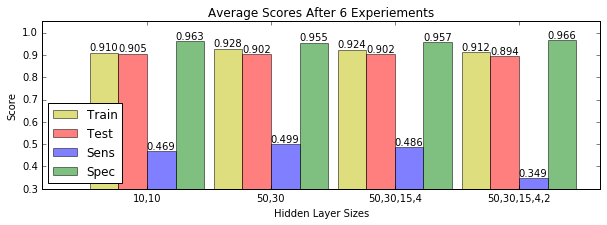

In [135]:
def plot_4bars_optimal_hidden_layers(train, test, sens, spec, title,  
                               hidden_layer_names=["10", "10,10", "10,10,10", "50", "50,30", "50, 30, 15", "50,30,15,4", "50,30,15,4,2"]):
    plt.figure(figsize=(10,3))
    index = [i for i in range(len(train))]
    widths=.23
    rects1 = plt.bar(index, train, align="center", width=widths, label="Train", color="y", alpha=.5)
    rects2 = plt.bar([i+widths for i in index], test, align="center", width=widths, label="Test",color="r", alpha=.5)
    rects3 = plt.bar([i+(widths*2) for i in index], sens, align="center", width=widths, label="Sens",color="b", alpha=.5)
    rects4 = plt.bar([i+(widths*3) for i in index], spec, align="center", width=widths, label="Spec",color="g", alpha=.5)
    
    
    plt.legend(loc=3)
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)
#     plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.ylim(.3,1.05)
    plt.title("Average "+title)
    plt.xlabel("Hidden Layer Sizes")
    plt.ylabel("Score")
    plt.xticks([i+(widths*2)-widths/2 for i in index], hidden_layer_names)
    plt.show()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.00*height,'%.3f'%height,ha='center', va='bottom')

optimal_scores = [[0.91026699697219915, 0.90536435754519451, 0.46879347458867587, 0.96314068915243123], [0.92777515630529661, 0.90209089032410272, 0.499375838434446, 0.95535819099742303], [0.92406904958515212, 0.9017370019758767, 0.48571430172321745, 0.9566584511810996], [0.91238055916008021, 0.89370078740157488, 0.34870707865332223, 0.96606995274371921]]
aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_4bars_optimal_hidden_layers(aveop_train_acc,aveop_accuracy,aveop_sensitivity,aveop_specificity, "Scores After 6 Experiements", ["10,10", "50,30", "50,30,15,4","50,30,15,4,2"])

### 6 experiements per MLP (different graphs)

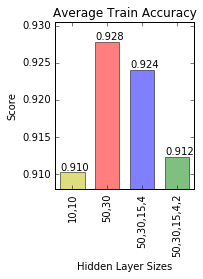

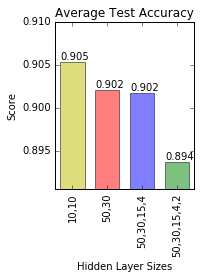

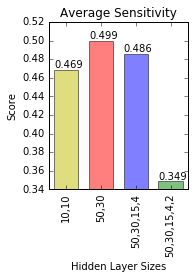

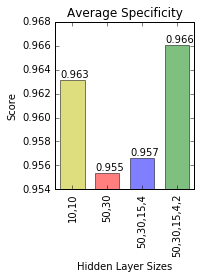

In [174]:
# optimal_hidden_layers = [(10,10), (50,30), (50,30,15,4), (50,30,15,4,2)]
# optimal_scores = get_scores_given_hidden_layers(optimal_hidden_layers, 6)
# print(optimal_scores)
# winsound.Beep(400,400)
# winsound.Beep(300,400)

optimal_scores = [[0.91026699697219915, 0.90536435754519451, 0.46879347458867587, 0.96314068915243123], [0.92777515630529661, 0.90209089032410272, 0.499375838434446, 0.95535819099742303], [0.92406904958515212, 0.9017370019758767, 0.48571430172321745, 0.9566584511810996], [0.91238055916008021, 0.89370078740157488, 0.34870707865332223, 0.96606995274371921]]

aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
    
def plot_optimal_hidden_layers(hplist, title,  
                               hidden_layer_names=["10", "10,10", "10,10,10", "50", "50,30", "50, 30, 15", "50,30,15,4", "50,30,15,4,2"],
                              custom_ylim=False):
    plt.figure(figsize=(2.5,3))
    index = [i for i in range(len(hplist))]
    widths=.7
    rects = plt.bar(index, hplist, align="center", alpha=.5, color=["y", "r", "b", "g"], width=widths)
    autolabel_align_right(rects,widths)
    if custom_ylim == False:
        plt.ylim(round((min(hplist)-0.001)*100)/100, round((max(hplist)+0.01)*100)/100)
    else: 
        plt.ylim(custom_ylim[0],custom_ylim[1])
    plt.title("Average "+title)
    plt.xlabel("Hidden Layer Sizes")
    plt.ylabel("Score")
    plt.xticks(index, hidden_layer_names, rotation='vertical')
    plt.show()

def autolabel_align_right(rects, widths):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.+widths/10, 1.00*height,'%.3f'%height,ha='center', va='bottom')
hidden_layer_string = ["10,10", "50,30", "50,30,15,4","50,30,15,4,2"]
plot_optimal_hidden_layers(aveop_train_acc, "Train Accuracy", hidden_layer_string, [0.908, 0.9305])
plot_optimal_hidden_layers(aveop_accuracy, "Test Accuracy", hidden_layer_string, [0.8905,0.91])
plot_optimal_hidden_layers(aveop_sensitivity, "Sensitivity",hidden_layer_string, [0.34,0.52])
plot_optimal_hidden_layers(aveop_specificity, "Specificity", hidden_layer_string, [0.954,0.968])

### 20 random starts

In [289]:
optimal_hidden_layers = [(10,) , (10,10), (10,10,10), (50,), (50,30), (50, 30, 15), (50,30,15,4), (50,30,15,4,2)]
optimal_scores = get_scores_given_hidden_layers(optimal_hidden_layers, 20)
print(optimal_scores)
winsound.Beep(400,400)
winsound.Beep(300,400)

[[0.91131591364869635, 0.90677696186853041, 0.45842911877394632, 0.96529805961192228], [0.91003303055326179, 0.90648942758559681, 0.48946360153256707, 0.96092218443688748], [0.90861006252211873, 0.90536140847562607, 0.4809578544061302, 0.96075715143028617], [0.9203019936298219, 0.90675926745111912, 0.47842911877394628, 0.96266753350670142], [0.92552494986433886, 0.9042510837830664, 0.49118773946360161, 0.95816663332666541], [0.93036156659195446, 0.90113244271432369, 0.51149425287356309, 0.95199039807961605], [0.93044119381856805, 0.90065911704857127, 0.51620689655172414, 0.9508401680336066], [0.9098781998348473, 0.89353269043616756, 0.33176245210727973, 0.96685837167433486]]


In [9]:
optimal_scores = [[0.91131591364869635, 0.90677696186853041, 0.45842911877394632, 0.96529805961192228], [0.91003303055326179, 0.90648942758559681, 0.48946360153256707, 0.96092218443688748], [0.90861006252211873, 0.90536140847562607, 0.4809578544061302, 0.96075715143028617], [0.9203019936298219, 0.90675926745111912, 0.47842911877394628, 0.96266753350670142], [0.92552494986433886, 0.9042510837830664, 0.49118773946360161, 0.95816663332666541], [0.93036156659195446, 0.90113244271432369, 0.51149425287356309, 0.95199039807961605], [0.93044119381856805, 0.90065911704857127, 0.51620689655172414, 0.9508401680336066], [0.9098781998348473, 0.89353269043616756, 0.33176245210727973, 0.96685837167433486]]

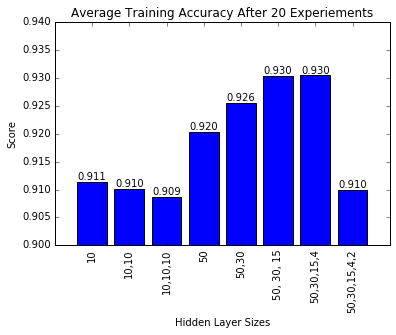

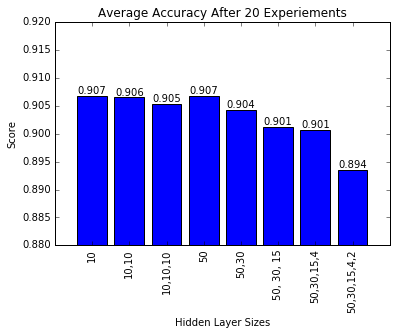

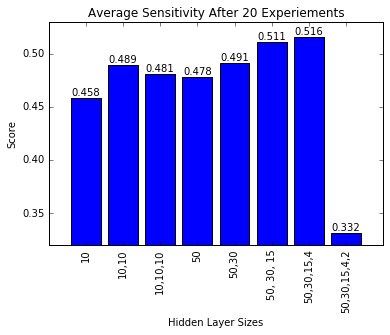

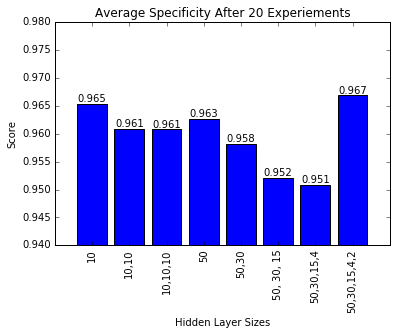

In [13]:
aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_optimal_hidden_layers(aveop_train_acc, "Training Accuracy After 20 Experiements")
plot_optimal_hidden_layers(aveop_accuracy, "Accuracy After 20 Experiements")
plot_optimal_hidden_layers(aveop_sensitivity, "Sensitivity After 20 Experiements")
plot_optimal_hidden_layers(aveop_specificity, "Specificity After 20 Experiements")

### 5 random starts

In [279]:
# averaged over 5 experiments
optimal_scores = get_scores_given_hidden_layers(optimal_hidden_layers)
print(optimal_scores)
winsound.Beep(400,400)
winsound.Beep(300,400)

[[0.91115960835201126, 0.90650269839865505, 0.44735632183908047, 0.96643328665733141], [0.90950808068892308, 0.90662655932053438, 0.48321839080459766, 0.9618923784756952], [0.90846997758641024, 0.90519331151021853, 0.48045977011494256, 0.96063212642528506], [0.92073846879792376, 0.90770591878262397, 0.49026819923371645, 0.96219243848769764], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.9308835672997523, 0.90158365035831201, 0.50191570881226055, 0.95375075015003008], [0.92111006252211869, 0.90545872777138814, 0.48766283524904208, 0.95999199839968008], [0.92282647162911413, 0.89263027514819071, 0.46559386973180078, 0.94836967393478699]]


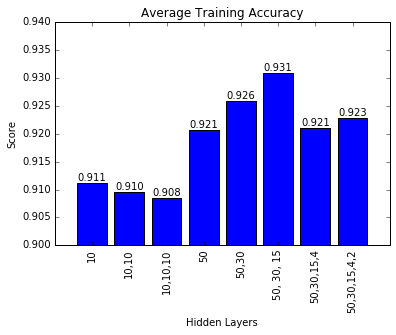

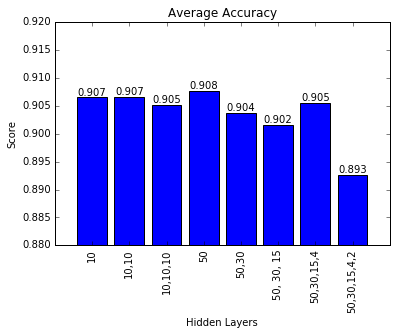

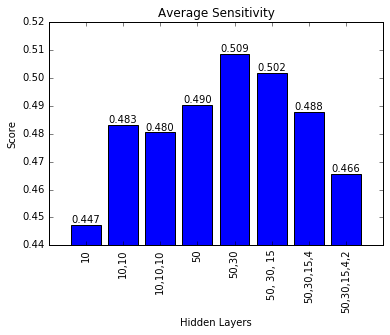

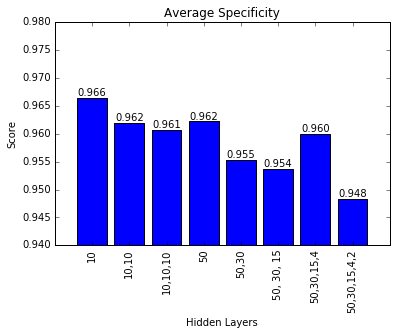

In [281]:
aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in optimal_scores:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_optimal_hidden_layers(aveop_train_acc, "Training Accuracy")
plot_optimal_hidden_layers(aveop_accuracy, "Accuracy")
plot_optimal_hidden_layers(aveop_sensitivity, "Sensitivity")
plot_optimal_hidden_layers(aveop_specificity, "Specificity")

# Solver

In [39]:
def get_averages_for_different_solvers(solvers):
    hplist = [[] for item in solvers]
    for i, item in enumerate(solvers):
        ave_list = [[],[],[],[]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        for j in range(1, 6+1):
            if j%2==0:
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=j*1000)
            clf = MLPClassifier(hidden_layer_sizes=(50,30), random_state=j*1000, max_iter=500, solver=item)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)
            
            ave_list[0].append(train_score)
            ave_list[1].append(Accuracy)
            ave_list[2].append(Sensitivity)
            ave_list[3].append(Specificity)            
        
        hplist[i].append(np.mean(ave_list[0]))
        hplist[i].append(np.mean(ave_list[1]))
        hplist[i].append(np.mean(ave_list[2]))
        hplist[i].append(np.mean(ave_list[3]))

    return hplist

In [40]:
solvers = ["lbfgs", "sgd", "adam"]
average_scores_for_solvers = get_averages_for_different_solvers(solvers)
print(average_scores_for_solvers)
# [[0.93719771145452402, 0.89650240349169852, 0.49080566515952645, 0.94965957307320814], [0.90644783925130756, 0.90294612049898271, 0.43891111330945726, 0.96375215733865838], [0.92655617160158854, 0.90461234480521391, 0.47415880532164389, 0.96101703196268451]]

[[0.93719771145452402, 0.89650240349169852, 0.49080566515952645, 0.94965957307320814], [0.90644783925130756, 0.90294612049898271, 0.43891111330945726, 0.96375215733865838], [0.92655617160158854, 0.90461234480521391, 0.47415880532164389, 0.96101703196268451]]


In [283]:
print(average_scores_for_solvers)
# [[0.93758994927450756, 0.89749623993630012, 0.50053639846743292, 0.94930986197239453], [0.90552671935826368, 0.90464478457046804, 0.44229885057471263, 0.96499299859971988], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229]]

[[0.93758994927450756, 0.89749623993630012, 0.50053639846743292, 0.94930986197239453], [0.90552671935826368, 0.90464478457046804, 0.44229885057471263, 0.96499299859971988], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229]]


In [37]:
def plot_solvers(hplist, title, solvers=["lbfgs", "sgd", "adam"]):
    plt.figure(figsize=(3,4))
    index = [i for i in range(len(hplist))]
    rects = plt.bar(index, hplist, align="center", width=0.30, color=["r","b","g"])#,yerr=hplist)
    autolabel(rects)
    plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.title("Average Solver "+title)
    plt.xlabel("Solver")
    plt.ylabel("Score")
    plt.xticks(index, solvers)#, rotation='vertical')
    plt.show()

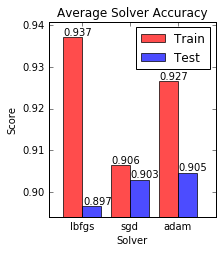

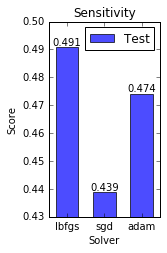

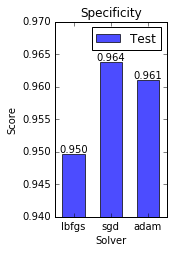

In [91]:
def autolabel_two_bars(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.+.12, 1.00*height,'%.3f'%height,ha='center', va='bottom')
def plot_2solvers(train, test, title, solvers=["lbfgs", "sgd", "adam"]):
    plt.figure(figsize=(3,3.5))
    index = [i for i in range(len(train))]
    index2 = [i+.4 for i in range(len(train))]
    rects = plt.bar(index, train, align="center", width=0.4, color="r", alpha=.7, label="Train")#,yerr=hplist)
    rects2 = plt.bar(index2, test, align="center", width=0.4, color="b", alpha=.7, label="Test")#,yerr=hplist)
    autolabel_two_bars(rects)
    autolabel_two_bars(rects2)
    plt.ylim(0.894, 0.9409)
#     plt.ylim(round((min(test)-0.01)*100)/100, round((max(train)+0.01)*100)/100)
    plt.title("Average Solver "+title)
    plt.xlabel("Solver")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.xticks([i+.2 for i in index], solvers)#, rotation='vertical')
    plt.savefig("../Figures/Average Solver Train and Test.png")
    plt.show()
    
def plot_solvers(hplist, title, solvers=["lbfgs", "sgd", "adam"]):
    plt.figure(figsize=(2,3.5))
    index = [i for i in range(len(hplist))]
    rects = plt.bar(index, hplist, align="center", width=0.60, label="Test", alpha=.7)#, color=[b","g"])#,yerr=hplist)
    autolabel(rects)
    plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.title(title)
    plt.xlabel("Solver")
    plt.ylabel("Score")
    plt.xticks(index, solvers)#, rotation='vertical')
    plt.legend(loc="best")
    plt.savefig("../Figures/Average Solver %s.png"%title)
    plt.show()
    
average_scores_for_solvers = [[0.93719771145452402, 0.89650240349169852, 0.49080566515952645, 0.94965957307320814], [0.90644783925130756, 0.90294612049898271, 0.43891111330945726, 0.96375215733865838], [0.92655617160158854, 0.90461234480521391, 0.47415880532164389, 0.96101703196268451]]
aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in average_scores_for_solvers:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_2solvers(aveop_train_acc,aveop_accuracy, "Accuracy")
# plot_solvers(aveop_train_acc, "Training Accuracy")
# plot_solvers(aveop_accuracy, "Accuracy")
plot_solvers(aveop_sensitivity, "Sensitivity")
plot_solvers(aveop_specificity, "Specificity")

# alpha

In [56]:
def get_averages_for_different_alphas(alphas):
    hplist = [[] for item in alphas]
    for i, item in enumerate(alphas):
        ave_list = [[],[],[],[]]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        for j in range(1,6+1):
            if j%2==0:
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=j*1000)
            clf = MLPClassifier(hidden_layer_sizes=(50,30), random_state=j*1000, max_iter=500, solver="adam", alpha=item)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            predictions = clf.predict(X_test)
            conf_matrix = confusion_matrix(y_test,predictions)
            TN = conf_matrix[0][0]
            TP = conf_matrix[1][1]
            FN = conf_matrix[1][0]
            FP = conf_matrix[0][1]
            Accuracy = (TP+TN)/(TN+TP+FN+FP)
            Sensitivity = TP/(TP+FN)
            Specificity = TN/(TN+FP)
            
            ave_list[0].append(train_score)
            ave_list[1].append(Accuracy)
            ave_list[2].append(Sensitivity)
            ave_list[3].append(Specificity)            
        
        hplist[i].append(np.mean(ave_list[0]))
        hplist[i].append(np.mean(ave_list[1]))
        hplist[i].append(np.mean(ave_list[2]))
        hplist[i].append(np.mean(ave_list[3]))
    return hplist

In [57]:
alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]
average_scores_for_alphas = get_averages_for_different_alphas(alphas)
print(average_scores_for_alphas)
# [[0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229], [0.92594667924973462, 0.90372467486508012, 0.5086590038314176, 0.95529105821164229]]
# [[0.92532735637607644, 0.90526114011029524, 0.46519674827906554, 0.96297326103556313], [0.92583854350988937, 0.90489250641422636, 0.47053294653229982, 0.96183665712592836], [0.92655617160158854, 0.90461234480521391, 0.47415880532164389, 0.96101703196268451], [0.92636447642640862, 0.90450912737031475, 0.4789257710236608, 0.96028468447862192], [0.92229464039951248, 0.90624907841575986, 0.50220260643534076, 0.95925404667846204], [0.91526090204868071, 0.90639653189418734, 0.50183453391468469, 0.95939757204075826], [0.90197495183044307, 0.90116193341000927, 0.31227177425400104, 0.97831308500362379]]

[[0.92532735637607644, 0.90526114011029524, 0.46519674827906554, 0.96297326103556313], [0.92583854350988937, 0.90489250641422636, 0.47053294653229982, 0.96183665712592836], [0.92655617160158854, 0.90461234480521391, 0.47415880532164389, 0.96101703196268451], [0.92636447642640862, 0.90450912737031475, 0.4789257710236608, 0.96028468447862192], [0.92229464039951248, 0.90624907841575986, 0.50220260643534076, 0.95925404667846204], [0.91526090204868071, 0.90639653189418734, 0.50183453391468469, 0.95939757204075826], [0.90197495183044307, 0.90116193341000927, 0.31227177425400104, 0.97831308500362379]]


In [62]:
def plot_alphas(hplist, title, alphas=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e-0]):
    index = [i for i in range(len(hplist))]
    rects = plt.bar(index, hplist, align="center")#,yerr=hplist)
    autolabel(rects)
    plt.ylim(round((min(hplist)-0.01)*100)/100, round((max(hplist)+0.01)*100)/100)
    plt.title("Average Alpha "+title)
    plt.xlabel("Alpha")
    plt.ylabel("Score")
    plt.xticks(index, alphas, rotation='vertical')
    plt.show()

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.00*height,'%.3f'%height,ha='center', va='bottom')

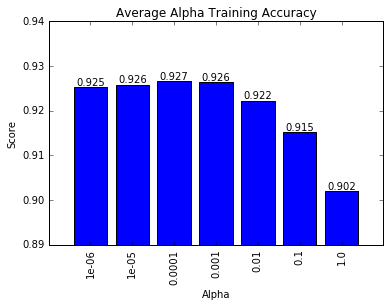

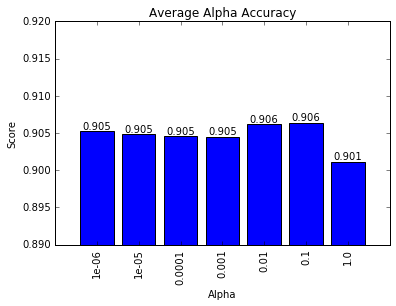

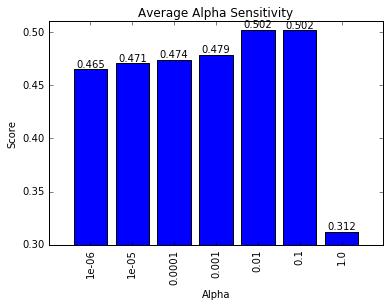

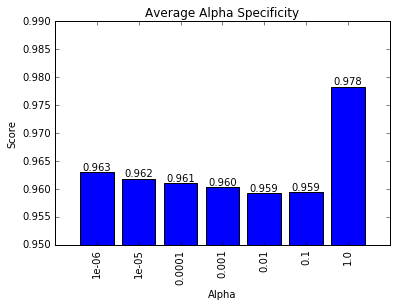

In [63]:
aveop_train_acc = []
aveop_accuracy = []
aveop_sensitivity = []
aveop_specificity = []
for item in average_scores_for_alphas:
    aveop_train_acc.append(item[0])
    aveop_accuracy.append(item[1])
    aveop_sensitivity.append(item[2])
    aveop_specificity.append(item[3])
plot_alphas(aveop_train_acc, "Training Accuracy")
plot_alphas(aveop_accuracy, "Accuracy")
plot_alphas(aveop_sensitivity, "Sensitivity")
plot_alphas(aveop_specificity, "Specificity")

# default ==> alpha=0.0001

In [65]:
# 0.1 is best